# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [2]:
import math
import sys

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

YOUR ANSWERS HERE

In [4]:
# YOUR CODE HERE

white_wine_data = pd.read_csv('wine_quality_white.tsv', sep='\t')

pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)

print(white_wine_data.sample(n=10))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  target
866             6.9              0.18         0.36             1.3      0.036                 40.0                 117.0  0.99340  3.27       0.95      9.5       7
1102            6.3              0.16         0.40             1.6      0.033                 59.0                 148.0  0.99140  3.44       0.53     11.4       5
2360            8.1              0.25         0.34            10.1      0.050                 30.0                 121.0  0.99724  3.17       0.49     10.1       6
1935            8.8              0.34         0.33             9.7      0.036                 46.0                 172.0  0.99660  3.08       0.40     10.2       5
2282            7.4              0.33         0.26            15.6      0.049                 67.0                 210.0  0.99907  3.06       0.68      9.5       5
4370            

In [5]:
print(white_wine_data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide      density           pH    sulphates      alcohol       target
count    4898.000000       4898.000000  4898.000000     4898.000000  4898.000000          4898.000000           4898.000000  4898.000000  4898.000000  4898.000000  4898.000000  4898.000000
mean        6.854788          0.278241     0.334192        6.391415     0.045772            35.308085            138.360657     0.994027     3.188267     0.489847    10.514267     5.877909
std         0.843868          0.100795     0.121020        5.072058     0.021848            17.007137             42.498065     0.002991     0.151001     0.114126     1.230621     0.885639
min         3.800000          0.080000     0.000000        0.600000     0.009000             2.000000              9.000000     0.987110     2.720000     0.220000     8.000000     3.000000
25%         6.300000          0.210000     0.270000    

In [6]:
print(white_wine_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  target                4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

YOUR ANSWERS HERE

Fixed Acidity
* The non-volatile acids in wine that don't evaporate and contribute to the wine's taste. Higher acidity can lead to a refreshing and crisp taste, while lower acidity leads to softer and less sharp wine.

Volatile Acidity
* The volatile acids in wine which contribute to a vinegar-like smell to the wine. Small amounts contribute to different tastes, but lage amounts can indicate that the wine went bad.

Citric Acid
* Used to make wines that are low in acid taste more fresh and crisp. It's a non-volatile acid.

Residual Sugar
* The natural sugar left in wine after fermentation. It is the primary component that determines a wine's sweetness. The range is usually from 1 g/L to 120 g/L.

Chlorides
* The salt minerals that contribute to the wine's salty taste. They can also affect the flavor, color and smell. Chlorides help to soften the acidic taste in wine.

Free Sulfur Dioxide
* It is a preservative that prevents a wine from spoiling by preventing the growth of bacteria.

Total Sulfur Dioxide
* Measures the total protective capabilities of wine against spoiling. White and rose wines often require more sulfur dioxide since they don't have the natural antioxidants found in red wine.

Density
* How dense the wine is. Higher density in wine leads to more concentrated flavors whereas lower density leads to less concentrated flavors, but the fruit is more stable.

pH
* How much acidity the wine has. White wines typically range from 3.0 - 3.4 and red wines range from 3.3 - 3.6. A lower pH means the wine has more acidity.

Sulphates
* A preservative in wine that prevents it from spoiling. It helps maintain freshness.

Alcohol
* Alcohol percentage of wine. Lighter wines typically range from 8% - 12%. Darker wines typically range from 13.5% - 15% or higher.

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

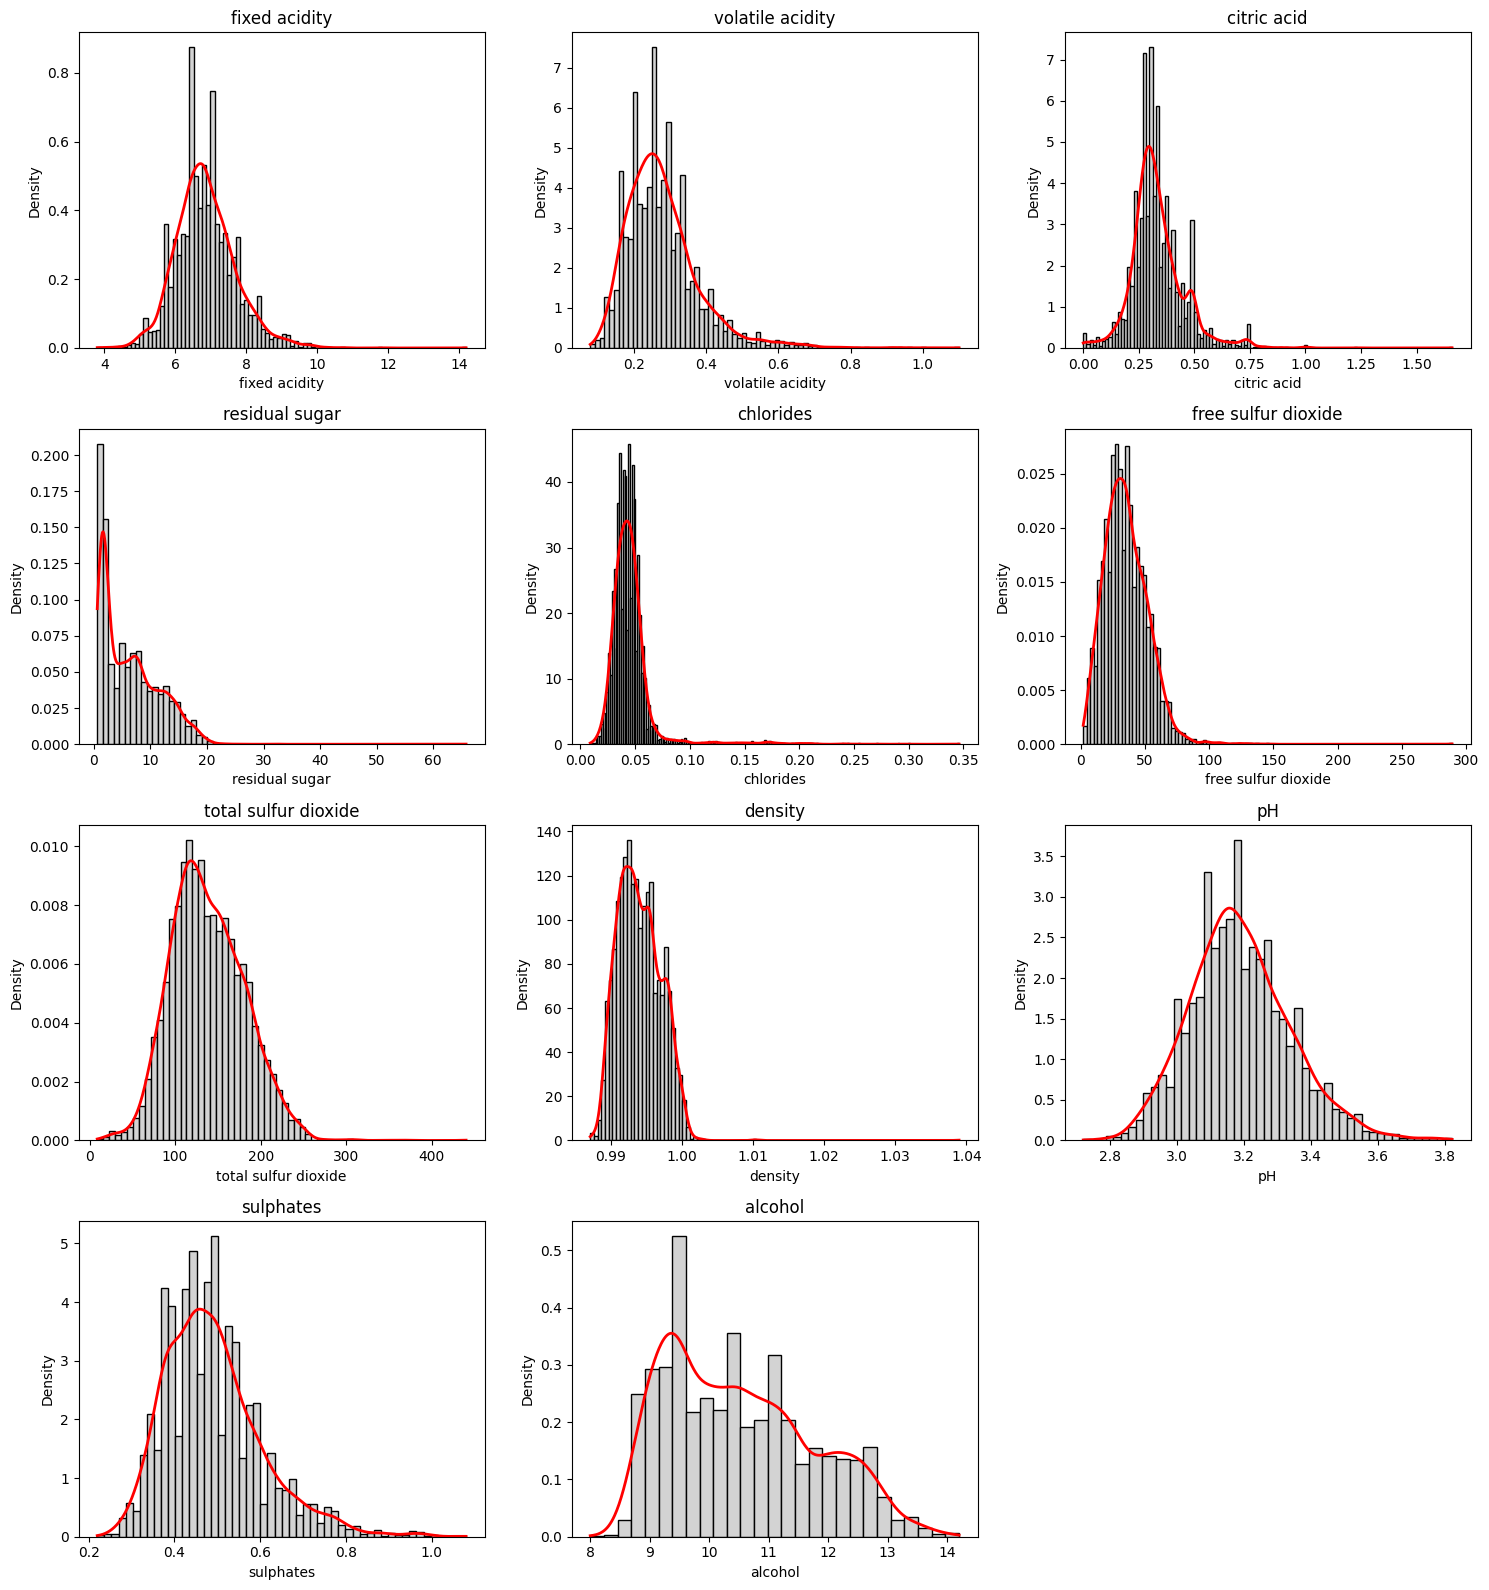

In [78]:
# YOUR CODE HERE
from scipy.stats import gaussian_kde

# Talked to chatGPT and decided upon Freedman-Diaconis with KDE overlay as supposed to rice to determine the number of bins. The reason is, my dataset was large and I didn't check each column for outliers so this is the best of both worlds (dealing with large datasets and handling outliers).
# I then took what I had for one column which was working and had chatGPT iterate over the columns except for target.
cols = [c for c in white_wine_data.columns if c != "target"]
n_cols = 3
n_rows = int(np.ceil(len(cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    # Try to convert to numeric; drop NaNs
    data = pd.to_numeric(white_wine_data[col], errors='coerce').dropna().values
    if len(data) == 0:
        continue  # skip empty or all-non-numeric columns

    # Freedman–Diaconis bins
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * iqr / (len(data) ** (1/3))
    bins_fd = int((data.max() - data.min()) / bin_width) if bin_width > 0 else 10

    # KDE
    density = gaussian_kde(data)
    x = np.linspace(data.min(), data.max(), 500)

    ax = axes[i]
    ax.hist(data, bins=bins_fd, color='lightgray', edgecolor='black', density=True)
    ax.plot(x, density(x), color='red', linewidth=2)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

Fixed Acidity
* Unimodal normal distribution

Volatile Acidity
* Unimodal that is skewed to the right

Citric Acid
* Mostly unimodal normal distribution with a small secondary bump

Residual Sugar
* Slightly bi-modal that is skewed to the right with small tail

Chlorides
* Unimodal that is skewed to the right with long tail

Free Sulfur Dioxide
* Unimodal that is skewed to the right with long tail

Total Sulfur Dioxide
* Unimodal normal distribution

Density
* Slightly multi-modal that is skewed to the right with long tail

pH
* Unimodal normal distribution

Sulphates
* Unimodal that is skewed to the right

Alcohol
* Slightly multi-modal that is skewed to the right

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

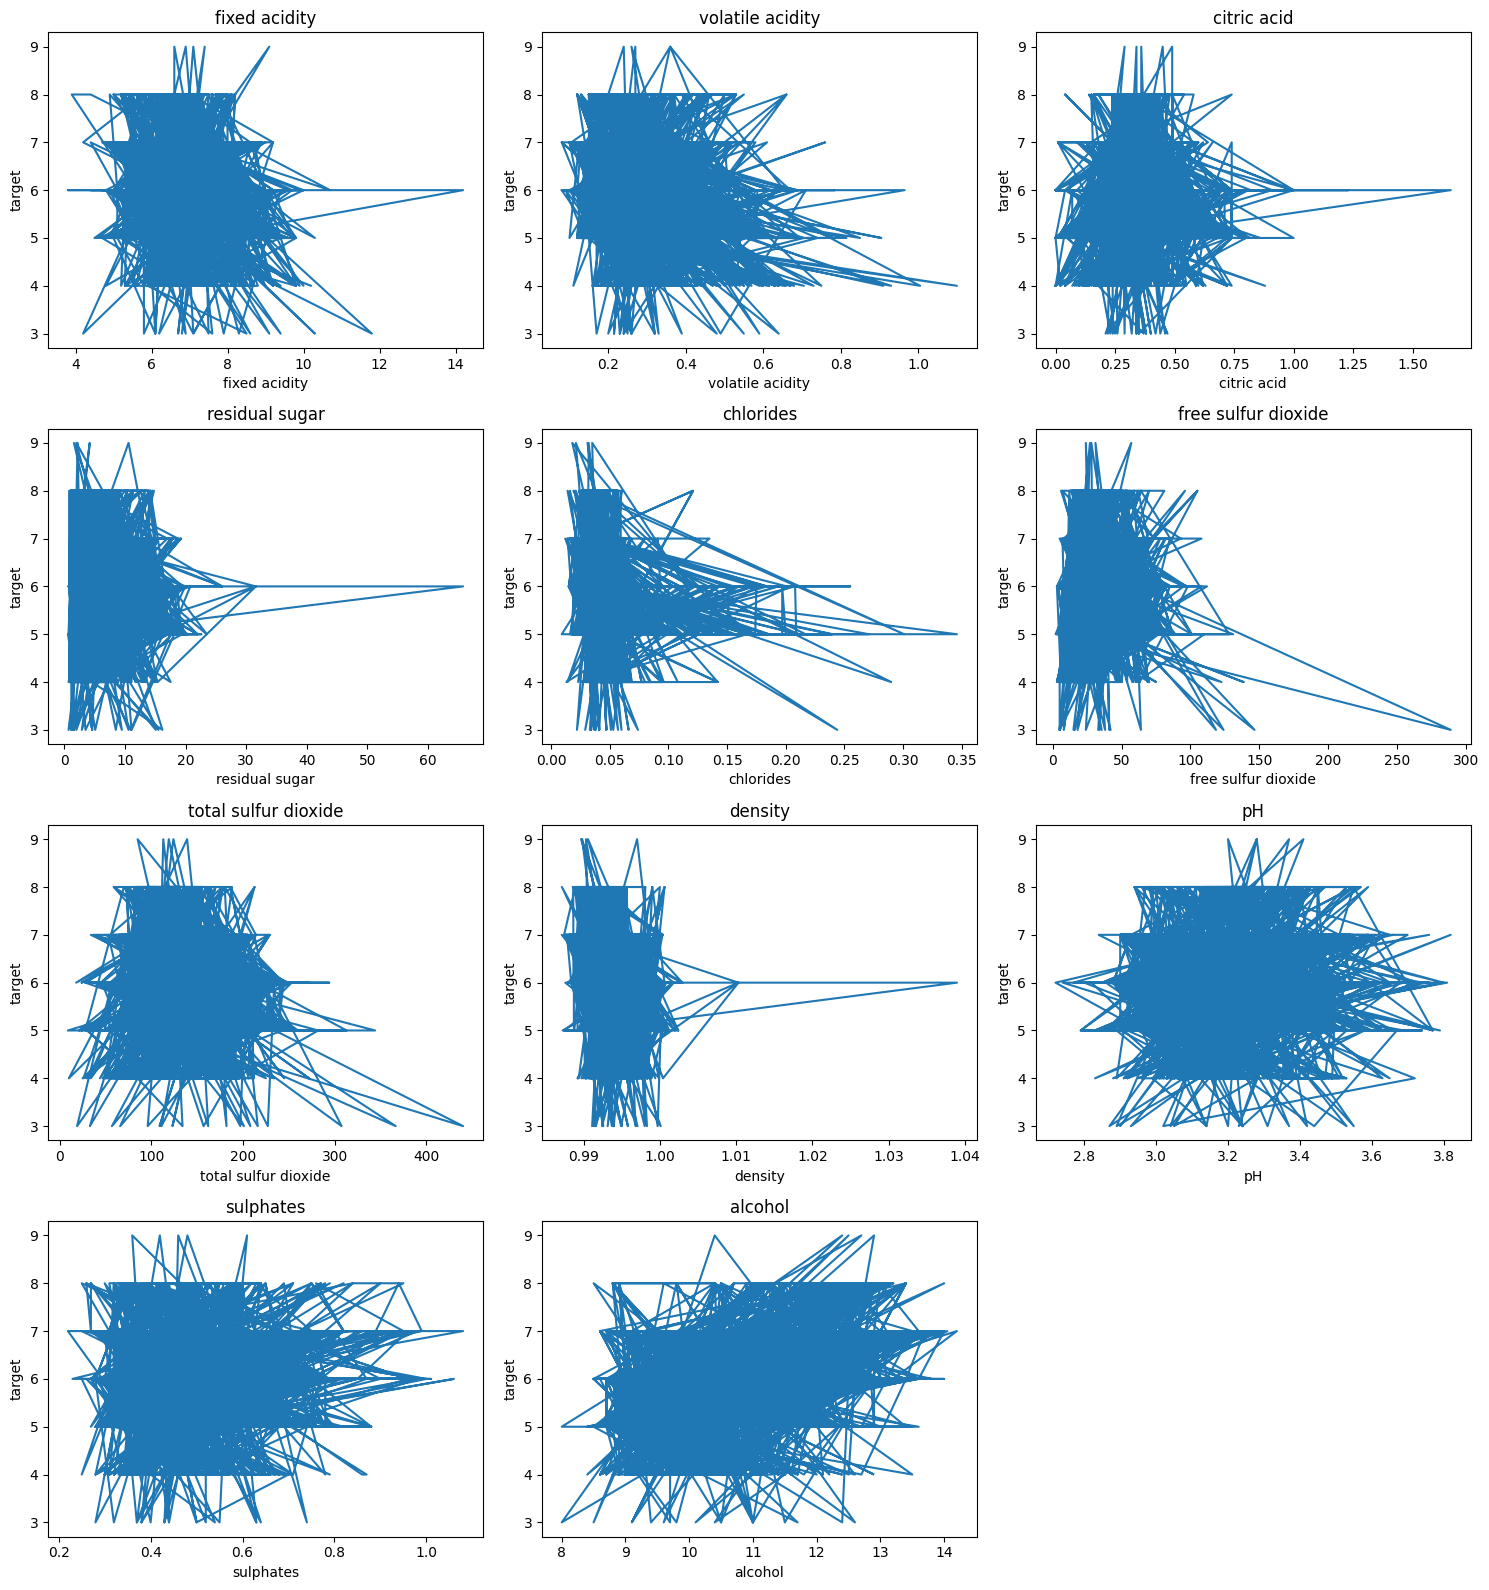

In [20]:
# YOUR CODE HERE

cols = [c for c in white_wine_data.columns if c != "target"]
target = white_wine_data["target"].values
n_cols = 3
n_rows = int(np.ceil(len(cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    # Try to convert to numeric; drop NaNs
    data = pd.to_numeric(white_wine_data[col], errors='coerce').dropna().values
    if len(data) == 0:
        continue  # skip empty or all-non-numeric columns

    ax = axes[i]
    ax.plot(data, target)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('target')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [22]:
cols = [c for c in white_wine_data.columns if c != "target"]
target = white_wine_data["target"].values
n_cols = 3
n_rows = int(np.ceil(len(cols) / n_cols))

for i, col in enumerate(cols):
    matrix_dependent = np.column_stack((white_wine_data[col], white_wine_data['target']))
    rank_dependent = np.linalg.matrix_rank(matrix_dependent)

    # independent if rank is 2 because it means that the rank increased from 1
    if rank_dependent == 2:
        print(f"{col} is independent")
    else:
        print(f"{col} is dependent")

fixed acidity is independent
volatile acidity is independent
citric acid is independent
residual sugar is independent
chlorides is independent
free sulfur dioxide is independent
total sulfur dioxide is independent
density is independent
pH is independent
sulphates is independent
alcohol is independent


YOUR ANSWERS HERE

All pairs are independent since the rank did not increase when calculating the matrix rank. This makes sense because all the columns cannot be used to perfectly predict the target column on their own. Essentially they are not perfect multiples of each other.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [27]:
# YOUR CODE HERE

X = white_wine_data.drop('target', axis=1, inplace=False).to_numpy()
b = white_wine_data['target']

constant = np.ones((X.shape[0], 1))
A = np.hstack((constant, X))

x = np.linalg.lstsq(A, b, rcond=None)[0]
intercept = x[0]
slope = x[1]
print(intercept, slope)

150.1928424812099 0.06551996135477559


YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


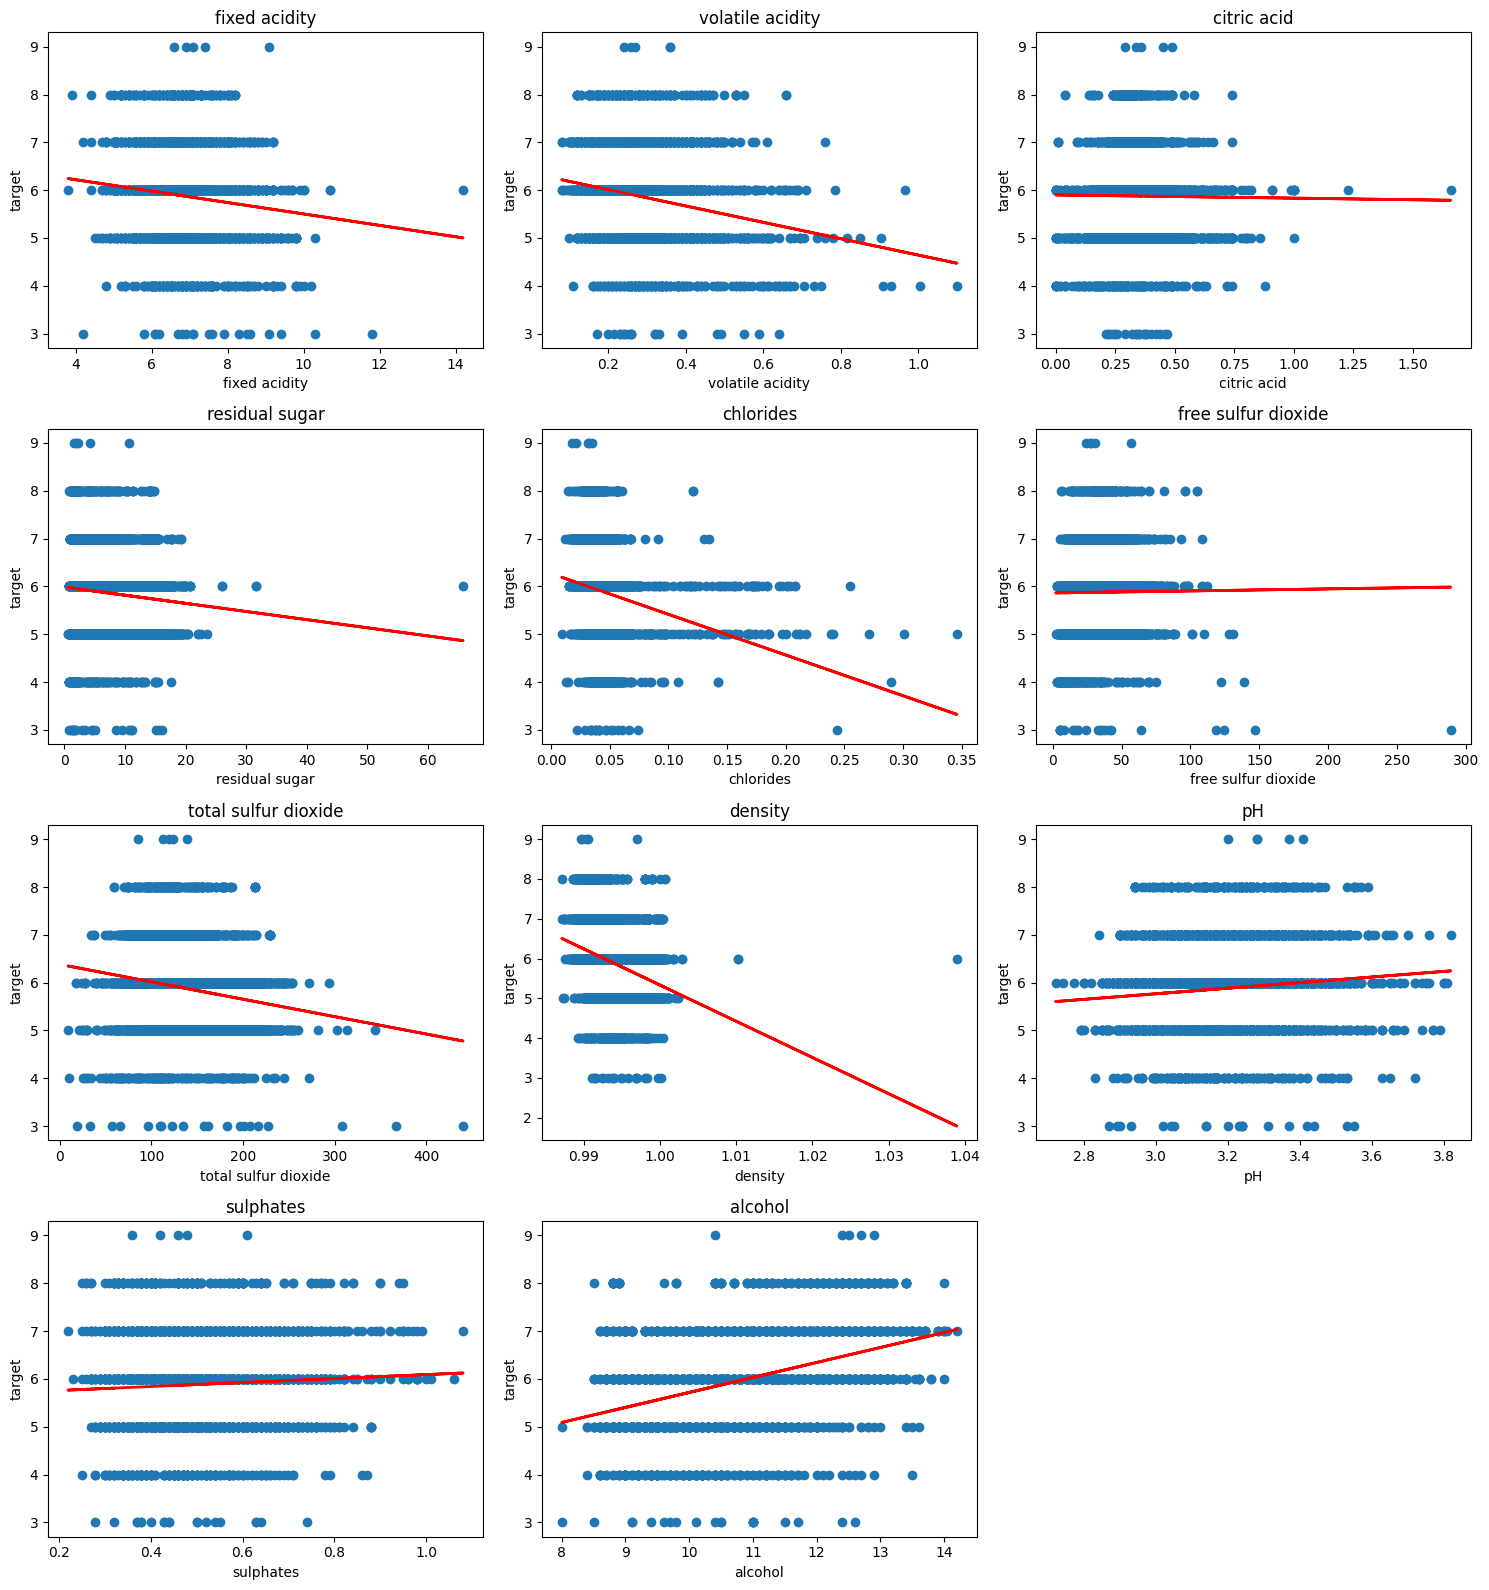

In [23]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression

cols = [c for c in white_wine_data.columns if c != "target"]
target = white_wine_data["target"].values
n_cols = 3
n_rows = int(np.ceil(len(cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    # Try to convert to numeric; drop NaNs
    data = pd.to_numeric(white_wine_data[col], errors='coerce').dropna().values
    if len(data) == 0:
        continue  # skip empty or all-non-numeric columns

    model = LinearRegression()
    X_train = np.array(data).reshape(-1, 1)
    model.fit(X_train, target)
    target_pred = model.predict(X_train)

    ax = axes[i]
    ax.scatter(X_train, target)
    ax.plot(X_train, target_pred, color='red', linewidth=2)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('target')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE

Problem 3
* I wanted to make sure I was choosing the correct number of bins for each histogram to correctly identify the distribution so I talked with ChatGPT to figure out the best way to determine the number of bins to use. I landed on using Freedman–Diaconis + KDE overlay.
* https://chatgpt.com/share/691258df-f278-800d-a01e-9b2151f05ac9

